# Prepared By - Altamas Khokhar

In [1]:
import pandas as pd


In [2]:
df1 = pd.read_csv('/content/drive/MyDrive/Retail/Copy of data_2018.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Retail/Copy of data_2019.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Retail/Copy of data_2020.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Retail/Copy of data_2021.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Retail/Copy of data_2022.csv')


In [3]:
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)


In [4]:
original_columns = df.columns.tolist()

In [5]:
new_columns = ['user_id', 'bill_id', 'line_item_amount', 'bill_discount', 'transaction_date', 'description', 'inventory_category', 'colour', 'size', 'zone_name', 'store_name', 'year']

In [6]:
df.columns = new_columns

In [7]:
df.head()


,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
0,403252497,401641461,1049.5,0.0,2018-08-11,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,TROUSER,Beige,44 / 112CM,East,East_7096,2018
1,357000026,397716483,659.4,0.0,2018-07-22,MB ITA14BLT016 35MM NA Olive Green 32 /,MB ITA14BLT016 35MM NA Olive Green 32 - 97CM,OLIVE GREEN,32 / 97CM,North,North_7018,2018
2,372773935,362298787,1899.0,0.0,2018-01-12,TR S15-NELSON FF KANSAS Tan 36 / 92CM,TROUSER,Tan,36 / 92CM,North,North_6505,2018
3,362714910,360637282,1799.0,0.0,2018-01-03,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,TROUSER,Khaki,32 / 82CM,North,North_6505,2018
4,393891557,374396867,1299.0,0.0,2018-03-29,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,ITA15BLT004-40MM,REDDISH BROWN,38 / 112CM,East,East_7310,2018


In [8]:
print('training_data duplicated:{}'.format(df.duplicated().sum()))

# to many duplicate data

training_data duplicated:1898076


In [9]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column Type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
tab_info

<ipython-input-9-4002d036c92c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
<ipython-input-9-4002d036c92c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.


,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
column Type,int64,int64,float64,float64,object,object,object,object,object,object,object,int64
null values (nb),0,0,0,0,0,17,697444,15555,15555,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.000201,8.249496,0.183987,0.183987,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8454383 entries, 0 to 8454382
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             int64  
 1   bill_id             int64  
 2   line_item_amount    float64
 3   bill_discount       float64
 4   transaction_date    object 
 5   description         object 
 6   inventory_category  object 
 7   colour              object 
 8   size                object 
 9   zone_name           object 
 10  store_name          object 
 11  year                int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 774.0+ MB


In [11]:

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['year'] = df['transaction_date'].dt.year

yearly_sales = df.groupby('year')['line_item_amount'].sum()


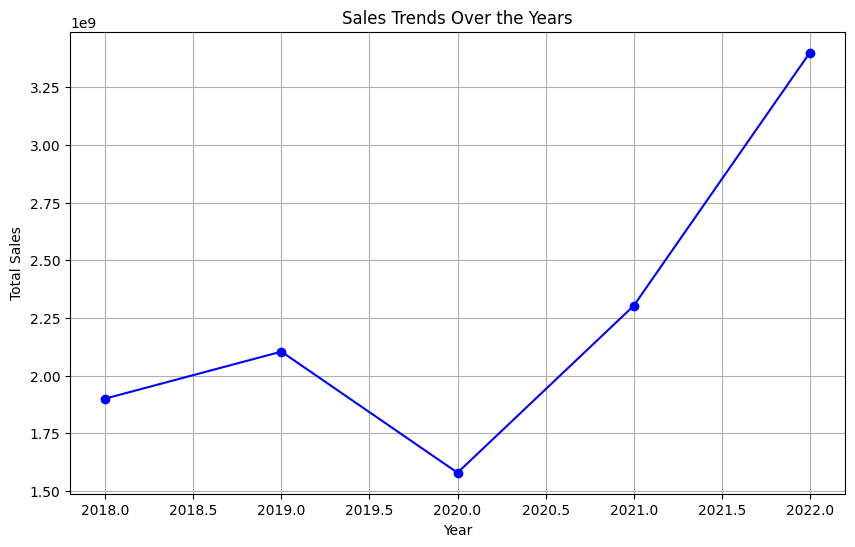

In [12]:
import matplotlib.pyplot as plt

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', color='b')
plt.title('Sales Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

# Show the plot
plt.show()


In [13]:
data = {'year': [2018, 2019, 2020, 2021, 2022],
        'Total Sale': [1.900333e+09, 2.103860e+09, 1.579160e+09, 2.302388e+09, 3.399087e+09]}

df1 = pd.DataFrame(data)

pd.options.display.float_format = '{:.1f}'.format

print(df1)


   year   Total Sale
0  2018 1900333000.0
1  2019 2103860000.0
2  2020 1579160000.0
3  2021 2302388000.0
4  2022 3399087000.0


In [14]:

# Fill null values in object datatype columns with a specific value, such as "Unknown"
df.fillna("Unknown", inplace=True)

In [15]:
# Stock Keeping Unit (SKU)
inventory_counts = df['inventory_category'].value_counts()

# Get the top 50 items
top_50_inventory_counts = inventory_counts.head(50)

# Convert the result to a DataFrame
top_50_inventory_counts_df = pd.DataFrame({'Category': top_50_inventory_counts.index, 'Count': top_50_inventory_counts.values})

# Display the DataFrame
print(top_50_inventory_counts_df)


                                       Category   Count
0                                       Unknown  697444
1                                     CARRY BAG  587802
2                                    MENS SHIRT  340249
3          CBG ITCBR00001 NA NA White 12x4x16``  279502
4   CTrims ITCBM00003 NA NA White ``10x4x14````  278136
5                       Mens Shirt - Sportswear  244857
6                        Mens Shirt - Jeanswear  154177
7                                        SHirts  146767
8                                  MENS TROUSER  137003
9                     Mens Trouser - Sportswear  106713
10                      Mens Trouser - Workwear   73750
11                    Mens T-Shirt - Sportswear   70230
12               Mens Denim Trouser - Jeanswear   60940
13                                 MENS T-SHIRT   59913
14                            EB GV 500 SEP2020   50985
15        TBG ITPTB00008 NA NA Brown (46x23x26)   43918
16          TBG ITPTB00011 NA NA Black 46x25x26 

In [16]:
# Top 20 Color
inventory_counts1 = df['colour'].value_counts()

# Get the top 20 items
top_20_inventory_counts1 = inventory_counts1.head(20)

# Convert the result to a DataFrame
top_20_inventory_counts_df1 = pd.DataFrame({'Color': top_20_inventory_counts1.index, 'Count': top_20_inventory_counts1.values})

# Display the DataFrame
print(top_20_inventory_counts_df1)


           Color    Count
0   NOT-CAPTURED  2900346
1           Navy  1042873
2          Black   376556
3          White   306377
4          Khaki   231795
5          Olive   195831
6         Indigo   149375
7            Red   134263
8     Light Grey   118718
9      Dark Grey   115869
10           Sky   107808
11     Dark Wash   107327
12          Blue    95290
13          Grey    92822
14         Brown    85680
15           Tan    82521
16      Burgundy    81780
17         Choco    69712
18       Md Wash    67255
19         Stone    61800


In [17]:
# Top 20 size
inventory_counts11 = df['size'].value_counts()

# Get the top 20 items
top_20_inventory_counts11 = inventory_counts11.head(20)

# Convert the result to a DataFrame
top_20_inventory_counts_df11 = pd.DataFrame({'size': top_20_inventory_counts11.index, 'Count': top_20_inventory_counts11.values})

# Display the DataFrame
print(top_20_inventory_counts_df11)


            size    Count
0   NOT-CAPTURED  2901660
1              M   901514
2              L   793624
3              S   605739
4        DEFAULT   587851
5             XL   435659
6             34   378318
7             32   319988
8             36   312049
9            2XL   252051
10            38   181208
11            30   146519
12            40   138326
13          Foot    77656
14            EL    71875
15            ES    52161
16            42    48474
17           EEL    44381
18           3XL    43881
19           EES    42826


In [18]:
# Top zone_name
inventory_counts111 = df['zone_name'].value_counts()

# Get the top zone_name
top_20_inventory_counts111 = inventory_counts111.head(6)

# Convert the result to a DataFrame
top_20_inventory_counts_df111 = pd.DataFrame({'zone_name': top_20_inventory_counts111.index, 'Count': top_20_inventory_counts111.values})

# Display the DataFrame
print(top_20_inventory_counts_df111)


  zone_name    Count
0     South  5597570
1     North  1064971
2      West   954086
3      East   627788
4      ROOT   175777
5   Central    34191


In [19]:
# Top store_name
inventory_counts1111 = df['store_name'].value_counts()

# Get the top zone_name
top_20_inventory_counts1111 = inventory_counts1111.head(20)

# Convert the result to a DataFrame
top_20_inventory_counts_df1111 = pd.DataFrame({'store_name': top_20_inventory_counts1111.index, 'Count': top_20_inventory_counts1111.values})

# Display the DataFrame
print(top_20_inventory_counts_df1111)


        store_name   Count
0       South_7001  211539
1   ROOT_ecomstore  172591
2       South_7489  146812
3       South_7017  144673
4       South_7480  132478
5       South_7005  126162
6       South_7077  119130
7       South_7282  114126
8       North_7283  113832
9       South_7038  112397
10      South_7045  105810
11      South_7267  104773
12      South_7467  101636
13      South_7120  100937
14      South_7135   98257
15      South_7121   93989
16      South_7032   93895
17      South_7037   92177
18      North_7155   90925
19       West_7056   87408


In [20]:
# Number of unique customers
unique_customers = df['user_id'].nunique()
print(f"Number of unique customers: {unique_customers}")

# Repeat customers (customers who made more than one purchase)
customer_purchase_counts = df['user_id'].value_counts()
repeat_customers = len(customer_purchase_counts[customer_purchase_counts > 1])
print(f"Number of repeat customers: {repeat_customers}")




Number of unique customers: 964818
Number of repeat customers: 810256


In [21]:
# Customer lifetime value (CLV)

average_purchase_value = df['line_item_amount'].mean()
average_purchase_frequency = len(df) / unique_customers
average_customer_lifetime = 1 / (1 - repeat_customers / unique_customers)
clv = average_purchase_value * average_purchase_frequency * average_customer_lifetime
print(f"Average Customer Lifetime Value (CLV): {clv}")

Average Customer Lifetime Value (CLV): 73011.66670678186


What is a Good Customer Lifetime Value?
It is a good range if you are able to achieve a CLV that falls between 3-5 times your cost of customer acquisition. So, for example, if you are spending an average of 150 in acquiring a new customer, you should aim for a CLV of at least 450!

In [22]:
average_purchase_frequency

8.762671301737736

In [23]:
# Top bill_discount
inventory_counts11111 = df['bill_discount'].value_counts()

# Get the top bill_discount
top_20_inventory_counts11111 = inventory_counts11111.head(20)

# Convert the result to a DataFrame
top_20_inventory_counts_df11111 = pd.DataFrame({'bill_discount': top_20_inventory_counts11111.index, 'Count': top_20_inventory_counts11111.values})

# Display the DataFrame
print(top_20_inventory_counts_df11111)


    bill_discount    Count
0             0.0  7987894
1           500.0    71463
2          1000.0    66375
3          2000.0    18664
4          1500.0    16265
5          3000.0    10630
6           700.0     8050
7           600.0     7887
8           800.0     6611
9          4000.0     5080
10         2500.0     4748
11         1200.0     4589
12          400.0     4545
13          900.0     4128
14         1400.0     3840
15          300.0     3822
16         1300.0     3476
17         6000.0     3236
18         1800.0     3112
19         1100.0     3085


In [24]:

# The average discount amount
average_discount_amount = df['bill_discount'].mean()
print(f"Average Discount Amount: Rs. {average_discount_amount:.2f}")


Average Discount Amount: Rs. 92.85


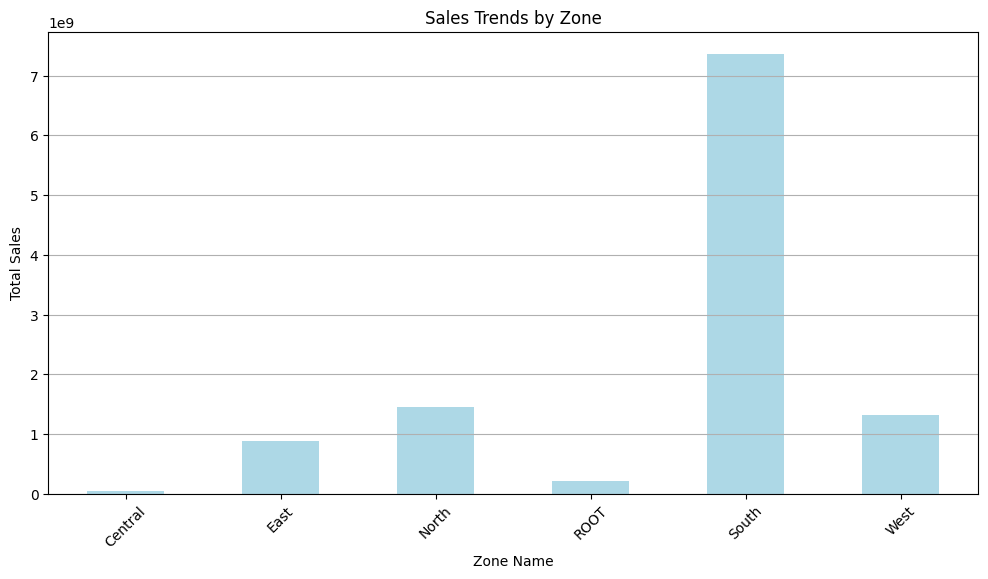

In [25]:
# Group data by 'zone_name' and calculate total sales for each zone
zone_sales = df.groupby('zone_name')['line_item_amount'].sum()

# Plot a bar chart for sales by zone
plt.figure(figsize=(12, 6))
zone_sales.plot(kind='bar', color='lightblue')
plt.title('Sales Trends by Zone')
plt.xlabel('Zone Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



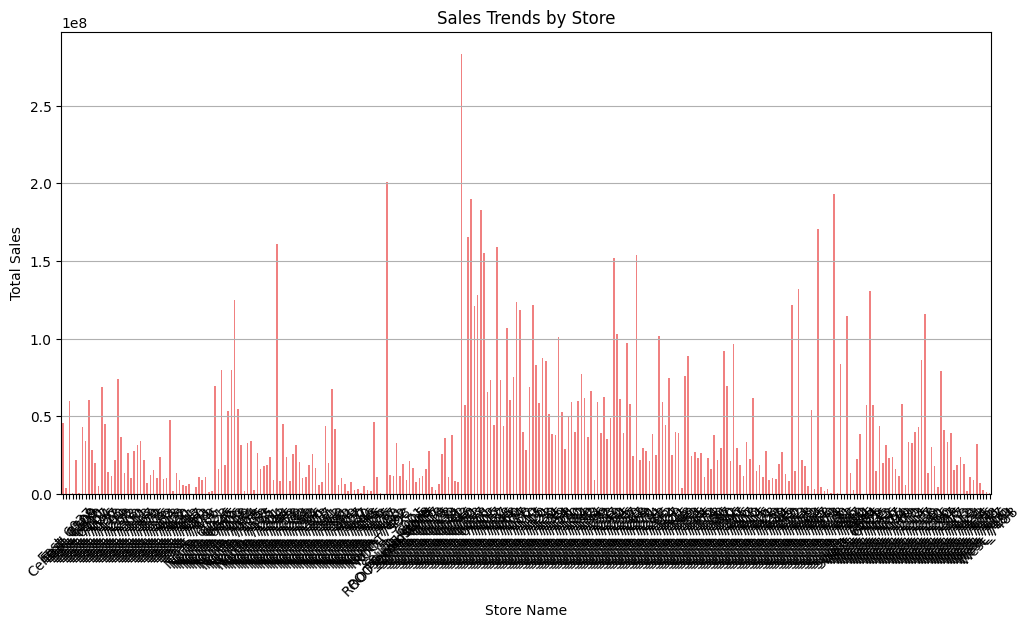

In [28]:
# Group data by 'store_name' and calculate total sales for each store
store_sales = df.groupby('store_name')['line_item_amount'].sum()

# Plot a bar chart for sales by store
plt.figure(figsize=(12, 6))
store_sales.plot(kind='bar', color='lightcoral')
plt.title('Sales Trends by Store')
plt.xlabel('Store Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


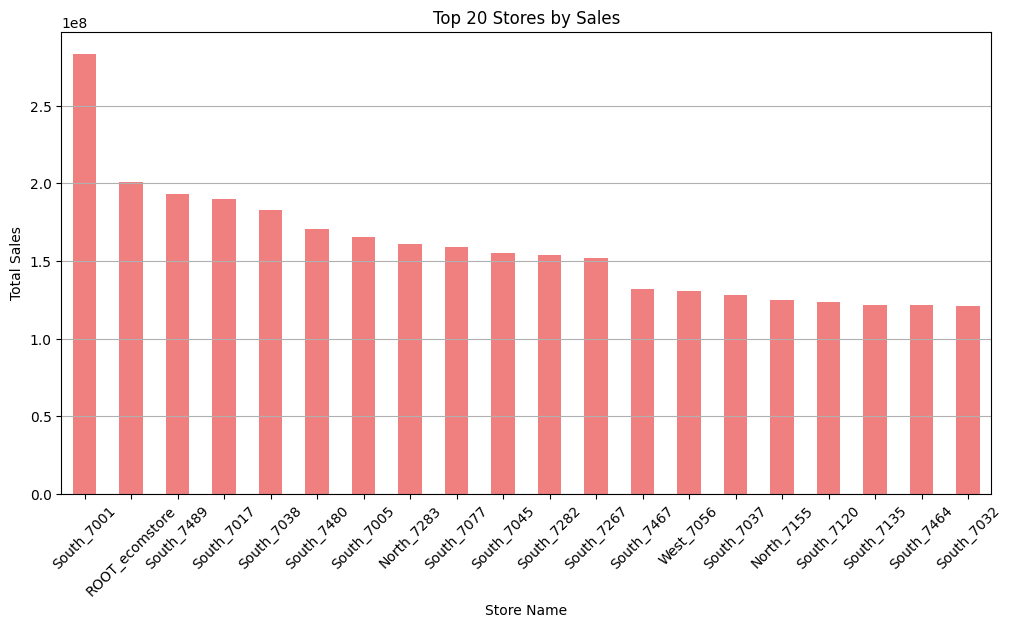

In [29]:
# Group data by 'store_name' and calculate total sales for each store
store_sales = df.groupby('store_name')['line_item_amount'].sum()

# Sort the stores by total sales in descending order and select the top 20
top_20_stores = store_sales.sort_values(ascending=False).head(20)

# Plot a bar chart for sales by the top 20 stores
plt.figure(figsize=(12, 6))
top_20_stores.plot(kind='bar', color='lightcoral')
plt.title('Top 20 Stores by Sales')
plt.xlabel('Store Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
